## Draft of expanded model evaluation

This is the model evaluation we want to put in the Supplement. 

Summary of changes:

- We present scatter plots of DIC, TA, and $\Omega_A$ - all 5 years of modelled output on the same plot, instead of 5 separate plots. We present scatterplots of points differentiated both by-depth and by-region. 
- We show a range of the model evaluation metrics for years 2013-2017, including Omega
- We have added a substantial amount (n = 150) of observations. these did not result in a meaningful difference in model metrics.

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import seawater
import netCDF4 as nc
import sys
sys.path.append('/data/tjarniko/mocsy')
import mocsy
import gsw
import warnings

from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)
import warnings
warnings.filterwarnings('ignore')

In [25]:
dset = 'COMB'

tdir = './extracted_calculated/'
yr = 2015; 
fname = f'{tdir}YR{yr}_{dset}_salspace_modeloutput_with_Omega.csv'
MOD_2015 = pd.read_csv(fname)
fname = f'{tdir}YR{yr}_{dset}_salspace_modeloutput_with_Omega.csv'
MOD_2015_2 = pd.read_csv(fname)
yr = 2016; 
fname = f'{tdir}YR{yr}_{dset}_salspace_modeloutput_with_Omega.csv'
MOD_2016 = pd.read_csv(fname)
yr = 2017; 
fname = f'{tdir}YR{yr}_{dset}_salspace_modeloutput_with_Omega.csv'
MOD_2017 = pd.read_csv(fname)
yr = 2018; 
fname = f'{tdir}YR{yr}_{dset}_salspace_modeloutput_with_Omega.csv'
MOD_2018 = pd.read_csv(fname)
yr = 2019; 
fname = f'{tdir}YR{yr}_{dset}_salspace_modeloutput_with_Omega.csv'
MOD_2019 = pd.read_csv(fname)

MOD_2018['OmegaA'][MOD_2018['OmegaA']>1e10] = np.nan
MOD_2019['OmegaA'][MOD_2019['OmegaA']>1e10] = np.nan
MOD_2015['OmegaA'][MOD_2015['OmegaA']>1e10] = np.nan
MOD_2016['OmegaA'][MOD_2016['OmegaA']>1e10] = np.nan
MOD_2017['OmegaA'][MOD_2017['OmegaA']>1e10] = np.nan

fname = f'./extracted_calculated/OBS_COMB_MASKED_umolL.csv'
OBS = pd.read_csv(fname)
# print(OBS)

In [26]:
print(np.min((MOD_2015['lb_loc'])))
print(np.min((MOD_2015_2['lb_loc'])))

print()

1.0
1.0



In [27]:
# ub = MOD_2013['ub_loc'][:]
# lb = MOD_2013['lb_loc'][:]
# print(np.size(np.where(np.isnan(lb))))
# dic13 = MOD_2013['dic'][:]
# print(np.size(np.where(np.isnan(lb)))+np.size(np.where(np.isnan(ub))))
# print(np.size(np.where(np.isnan(dic13))))

# ub = MOD_2014['ub_loc'][:]
# print(np.size(np.where(np.isnan(lb))))
# lb = MOD_2014['lb_loc'][:]
# print(np.size(np.where(np.isnan(lb))))
# dic13 = MOD_2014['dic'][:]
# print(np.size(np.where(np.isnan(lb)))+np.size(np.where(np.isnan(ub))))
# print(np.size(np.where(np.isnan(dic13))))



## [A] - scatter plots

In [28]:
# print(MOD_2015['lb_loc'])
# print(np.max(OBS['lb_loc']))

In [29]:
# print(np.mean(OBS['OmegaA'][OBS['P'] < 1000 & ] ))
# print(np.mean(MOD_2015['OmegaA'][OBS['P'] < 1000]))
# print(np.min(MOD_2015['OmegaA'][OBS['P'] < 1000]))
# print(np.max(MOD_2015['OmegaA'][OBS['P'] < 1000]))
# print(np.min(OBS['OmegaA'][OBS['P'] < 1000] ))
# print(np.max(OBS['OmegaA'][OBS['P'] < 1000] ))

# plt.plot(OBS['OmegaA'][OBS['P'] < 1000], MOD_2015['OmegaA'][OBS['P'] < 1000])
# plt.set_yscale('log')
# plt.set_xscale('log')

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


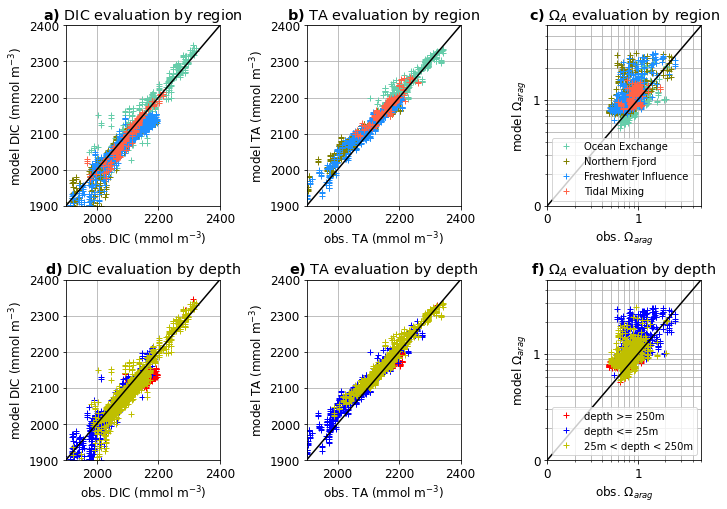

In [43]:
import matplotlib.ticker as mticker
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}


yrs = np.arange(2015,2020,1)
fact = 0.4

evaled = ['dic','alk','OmegaA']
reglabs = ['Ocean Exchange','Northern Fjord','Freshwater Influence','Tidal Mixing',]
reg_cols = ['mediumaquamarine', 'olive','dodgerblue', 'tomato',  ]
fig, axs = plt.subplots(2,3, figsize=(25*fact, 18.1*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i in range(0,3):
    for c in range(1,5):
        axs[i].plot(OBS[evaled[i]][OBS["loc_tag"] == c],MOD_2018[evaled[i]][OBS["loc_tag"] == c],\
                   color = reg_cols[c-1], marker = '+', label = reglabs[c-1],linestyle = '')
        axs[i].plot(OBS[evaled[i]][OBS["loc_tag"] == c],MOD_2019[evaled[i]][OBS["loc_tag"] == c],\
                   marker = '+', linestyle = '', color = reg_cols[c-1])
        axs[i].plot(OBS[evaled[i]][OBS["loc_tag"] == c],MOD_2015[evaled[i]][OBS["loc_tag"] == c],\
                   marker = '+', linestyle = '', color = reg_cols[c-1])
        axs[i].plot(OBS[evaled[i]][OBS["loc_tag"] == c],MOD_2016[evaled[i]][OBS["loc_tag"] == c],\
                   marker = '+', linestyle = '', color = reg_cols[c-1])
        axs[i].plot(OBS[evaled[i]][OBS["loc_tag"] == c],MOD_2017[evaled[i]][OBS["loc_tag"] == c],\
                   marker = '+', linestyle = '', color = reg_cols[c-1])
#         print(np.size(OBS[evaled[i]][OBS["loc_tag"] == c]))
    axs[2].legend(ncol =1,loc = 'best', fontsize = 10)

for i in range(0,3):
    axs[i+3].plot(OBS[evaled[i]][OBS["P"] >= 250],MOD_2018[evaled[i]][OBS["P"] >= 250],\
               marker = '+', linestyle = '', color = 'r', label = 'depth >= 250m')#label = reglabs[c-1])
    axs[i+3].plot(OBS[evaled[i]][OBS["P"] >= 250],MOD_2019[evaled[i]][OBS["P"] >= 250],\
           marker = '+', linestyle = '', color = 'r' )#label = reglabs[c-1])
    axs[i+3].plot(OBS[evaled[i]][OBS["P"] >= 250],MOD_2015[evaled[i]][OBS["P"] >= 250],\
       marker = '+', linestyle = '', color = 'r' )#label = reglabs[c-1])
    axs[i+3].plot(OBS[evaled[i]][OBS["P"] >= 250],MOD_2016[evaled[i]][OBS["P"] >= 250],\
   marker = '+', linestyle = '', color = 'r' )#label = reglabs[c-1])
    axs[i+3].plot(OBS[evaled[i]][OBS["P"] >= 250],MOD_2017[evaled[i]][OBS["P"] >= 250],\
        marker = '+', linestyle = '', color = 'r' )#label = reglabs[c-1])
    
    axs[i+3].plot(OBS[evaled[i]][OBS["P"] <= 25],MOD_2018[evaled[i]][OBS["P"] <= 25],\
               marker = '+', linestyle = '', color = 'b', label = 'depth <= 25m ' )#label = reglabs[c-1])
    axs[i+3].plot(OBS[evaled[i]][OBS["P"] <= 25],MOD_2019[evaled[i]][OBS["P"] <= 25],\
           marker = '+', linestyle = '', color = 'b' )#label = reglabs[c-1])
    axs[i+3].plot(OBS[evaled[i]][OBS["P"] <= 25],MOD_2015[evaled[i]][OBS["P"] < 25],\
       marker = '+', linestyle = '', color = 'b' )#label = reglabs[c-1])
    axs[i+3].plot(OBS[evaled[i]][OBS["P"] <= 25],MOD_2016[evaled[i]][OBS["P"] < 25],\
       marker = '+', linestyle = '', color = 'b' )#label = reglabs[c-1])
    axs[i+3].plot(OBS[evaled[i]][OBS["P"] <= 25],MOD_2017[evaled[i]][OBS["P"] < 25],\
       marker = '+', linestyle = '', color = 'b' )#label = reglabs[c-1])
    
    tm  = (OBS["P"] > 25) & (OBS["P"] < 250) 
    axs[i+3].plot(OBS[evaled[i]][tm],MOD_2018[evaled[i]][tm],\
               marker = '+', linestyle = '', color = 'y', label = '25m < depth < 250m')#label = reglabs[c-1])
    axs[i+3].plot(OBS[evaled[i]][tm],MOD_2019[evaled[i]][tm],\
           marker = '+', linestyle = '', color = 'y')#label = reglabs[c-1])
    axs[i+3].plot(OBS[evaled[i]][tm],MOD_2015[evaled[i]][tm],\
           marker = '+', linestyle = '', color = 'y')#label = reglabs[c-1])
    axs[i+3].plot(OBS[evaled[i]][tm],MOD_2016[evaled[i]][tm],\
           marker = '+', linestyle = '', color = 'y')#label = reglabs[c-1])
    axs[i+3].plot(OBS[evaled[i]][tm],MOD_2017[evaled[i]][tm],\
           marker = '+', linestyle = '', color = 'y')#label = reglabs[c-1])

    axs[5].legend(ncol =1,loc = 'best', fontsize = 10)
    
tits = [r'$\bf{a)}$ DIC evaluation by region', 
        r'$\bf{b)}$ TA evaluation by region',\
       r'$\bf{c)}$ $\Omega_A$ evaluation by region',
        r'$\bf{d)}$ DIC evaluation by depth',
       r'$\bf{e)}$ TA evaluation by depth',
        r'$\bf{f)}$ $\Omega_A$ evaluation by depth ']
xlab = ['obs. DIC (mmol m$^{-3}$)', 'obs. TA (mmol m$^{-3}$)', 'obs. $\Omega_{arag}$',
        'obs. DIC (mmol m$^{-3}$)', 'obs. TA (mmol m$^{-3}$)', 'obs. $\Omega_{arag}$',]
ylab = ['model DIC (mmol m$^{-3}$)', 'model TA (mmol m$^{-3}$)', 'model $\Omega_{arag}$',
        'model DIC (mmol m$^{-3}$)', 'model TA (mmol m$^{-3}$)', 'model $\Omega_{arag}$',]

for i in range(0,6):
    axs[i].grid()
    axs[i].set_xlim([1900,2400])
    axs[i].set_ylim([1900,2400])
    axs[i].plot([1000,2400],[1000,2400],'k-')
    axs[i].set_title(tits[i])
    axs[i].set_xlabel(xlab[i])
    axs[i].set_ylabel(ylab[i])
    
    
# axs[0].set_title(r"$\bf{a)}$ DIC evaluation"
#            "\n"  # Newline: the backslash is interpreted as usual
#            r"selected $\Omega_{arag}$ thresholds - preindustrial", fontsize = fs)
    
axs[2].set_xlim([0.1,5])
axs[2].set_ylim([0.1,5])
axs[2].plot([0.1,5],[0.1,5],'k-')
axs[2].set_yscale('log')
axs[2].set_xscale('log')
axs[2].grid()
#axs[2].xaxis.set_minor_formatter(mticker.ScalarFormatter())

# axs[2].set_major_formatter(ScalarFormatter())
# axs[2].set_minor_formatter(NullFormatter())

axs[5].set_xlim([0.1,5])
axs[5].set_ylim([0.1,5])
axs[5].plot([0.1,5],[0.1,5],'k-')
axs[5].set_yscale('log')
axs[5].set_xscale('log')
#axs[5].tick_params(axis='x', rotation=45)

from matplotlib.ticker import StrMethodFormatter, NullFormatter
axs[2].yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
axs[2].yaxis.set_minor_formatter(NullFormatter())
from matplotlib.ticker import StrMethodFormatter, NullFormatter
axs[5].yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
axs[5].yaxis.set_minor_formatter(NullFormatter())

from matplotlib.ticker import StrMethodFormatter, NullFormatter
axs[2].xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
axs[2].xaxis.set_minor_formatter(NullFormatter())
from matplotlib.ticker import StrMethodFormatter, NullFormatter
axs[5].xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
axs[5].xaxis.set_minor_formatter(NullFormatter())


axs[2].grid(True, which="both", ls="-")
axs[5].grid(True, which="both", ls="-")
    
#fig.suptitle('MODEL POINTS MATCHED TO OBSERVATIONS IN SALINITY SPACE')
plt.tight_layout()
#fig.savefig('./CG_FIGS/FIG_CG_02_modeval.jpg', bbox_inches='tight', dpi = 300)

fig.savefig('./FIG_modeval.jpg', bbox_inches='tight', dpi = 300)


# [B] noticing domain proportion 

In [22]:
# w = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
# # print(w['gdept_1d'][0][0:21])
# # print(w['gdept_1d'][0][21:30])
# # print(w['gdept_1d'][0][32:40])

# import pickle
# csize = pickle.load(open('../pkls/cellsize_alg2.pkl', 'rb'))


# print(f'proportion of domain shallower than 25m: {np.nansum(csize[0:21,:,:])/np.nansum(csize[:,:,:])}')
# print(f'proportion of domain 25m-250m: {np.nansum(csize[21:32,:,:])/np.nansum(csize[:,:,:])}')
# print(f'proportion of domain deeper than 250m: {np.nansum(csize[32:40,:,:])/np.nansum(csize[:,:,:])}')

# print()
# totobs = (np.size(MOD_2013['dic']))
# totobs_25 = np.size(MOD_2013['dic'][OBS['P']<25])
# totobs_mid = np.size(MOD_2013['dic'][(OBS['P']>=25) & (OBS['P']<250)])
# totobs_deep = np.size(MOD_2013['dic'][ OBS['P']>=250])
# print(f'total amount of observations (depth space): {totobs}')
# print(f'proportion of obs shallower than 25m: {totobs_25/totobs}')
# print(f'proportion of obs 25m-250m: {totobs_mid/totobs}')
# print(f'proportion of obs deeper than 250m: {totobs_deep/totobs}')

## calculate metrics by depth

In [31]:
# def bias_box(obs,mod):
#     bias = (-np.mean(obs) + np.mean(mod))
#     return bias

# def RMSE_box(obs,mod):
#     RMSE = (np.sqrt(np.sum((mod - obs)**2) /len(obs)))
#     return RMSE

# def WSS_box(obs,mod):
#     xbar = np.mean(obs)
#     WSS = (1-(np.sum((mod - obs)**2)  / np.sum((np.abs(mod - xbar) + np.abs(obs - xbar))**2)))
#     return WSS

# mask_shal = OBS['P']<25
# mask_mid = (OBS['P']>=25) & (OBS['P']<250)
# mask_deep = (OBS['P']>=250)

# tms = [mask_shal, mask_mid, mask_deep,OBS['P']<1000]
# types = ['dic','alk','OmegaA']

# #metric, #thing being evaluated #mask
# factbox_2018 = np.zeros([3,3,4])

# #evaluated criterion
# for e in range(0,3):
#     for m in range(0,4):
#         factbox_2018[0,e,m] = bias_box(OBS[types[e]][tms[m]], MOD_2018[types[e]][tms[m]])
#         factbox_2018[1,e,m] = RMSE_box(OBS[types[e]][tms[m]], MOD_2018[types[e]][tms[m]])
#         factbox_2018[2,e,m] = WSS_box(OBS[types[e]][tms[m]], MOD_2018[types[e]][tms[m]])

# factbox_2019 = np.zeros([3,3,4])
# #evaluated criterion
# for e in range(0,3):
#     for m in range(0,4):
#         factbox_2019[0,e,m] = bias_box(OBS[types[e]][tms[m]], MOD_2019[types[e]][tms[m]])
#         factbox_2019[1,e,m] = RMSE_box(OBS[types[e]][tms[m]], MOD_2019[types[e]][tms[m]])
#         factbox_2019[2,e,m] = WSS_box(OBS[types[e]][tms[m]], MOD_2019[types[e]][tms[m]])
# #evaluated criterion
# factbox_2015 = np.zeros([3,3,4])
# for e in range(0,3):
#     for m in range(0,4):
#         factbox_2015[0,e,m] = bias_box(OBS[types[e]][tms[m]], MOD_2015[types[e]][tms[m]])
#         factbox_2015[1,e,m] = RMSE_box(OBS[types[e]][tms[m]], MOD_2015[types[e]][tms[m]])
#         factbox_2015[2,e,m] = WSS_box(OBS[types[e]][tms[m]], MOD_2015[types[e]][tms[m]])

# factbox_2016 = np.zeros([3,3,4])
# #evaluated criterion
# for e in range(0,3):
#     for m in range(0,4):
#         factbox_2016[0,e,m] = bias_box(OBS[types[e]][tms[m]], MOD_2016[types[e]][tms[m]])
#         factbox_2016[1,e,m] = RMSE_box(OBS[types[e]][tms[m]], MOD_2016[types[e]][tms[m]])
#         factbox_2016[2,e,m] = WSS_box(OBS[types[e]][tms[m]], MOD_2016[types[e]][tms[m]])

# factbox_2017 = np.zeros([3,3,4])
# #evaluated criterion
# for e in range(0,3):
#     for m in range(0,4):
#         factbox_2017[0,e,m] = bias_box(OBS[types[e]][tms[m]], MOD_2017[types[e]][tms[m]])
#         factbox_2017[1,e,m] = RMSE_box(OBS[types[e]][tms[m]], MOD_2017[types[e]][tms[m]])
#         factbox_2017[2,e,m] = WSS_box(OBS[types[e]][tms[m]], MOD_2017[types[e]][tms[m]])
    
# # print('bias with depth')
# # print(factbox_2018[0,2,:])
# # print(factbox_2019[0,2,:])
# # print(factbox_2015[0,2,:])
# # print(factbox_2016[0,2,:])
# # print(factbox_2017[0,2,:])

# big_factbox = np.zeros([5,3,3,4])
# big_factbox[0,:,:,:] = factbox_2018
# big_factbox[1,:,:,:] = factbox_2019
# big_factbox[2,:,:,:] = factbox_2015
# big_factbox[3,:,:,:] = factbox_2016
# big_factbox[4,:,:,:] = factbox_2017

In [33]:
print('bias in DIC')
for i in range(0,5):
    print(big_factbox[i,0,0,3])
print('bias in TA')
for i in range(0,5):
    print(big_factbox[i,0,1,3])
print('bias in omega')
for i in range(0,5):
    print(big_factbox[i,0,2,3])
    
print('RMSE in DIC')
for i in range(0,5):
    print(big_factbox[i,1,0,3])
print('RMSE in TA')
for i in range(0,5):
    print(big_factbox[i,1,1,3])
print('RMSE in omega')
for i in range(0,5):
    print(big_factbox[i,1,2,3])
    
    
print('WSS in DIC')
for i in range(0,5):
    print(big_factbox[i,2,0,3])
print('WSS in TA')
for i in range(0,5):
    print(big_factbox[i,2,1,3])
print('WSS in omega')
for i in range(0,5):
    print(big_factbox[i,2,2,3])

bias in DIC
14.41169290837297
2.840661215799173
6.906220481513628
3.634629128479446
10.422929931566614
bias in TA
32.12811880047957
30.764820161529315
24.26432951186007
28.38851160270633
26.631897427355852
bias in omega
0.11832832726343867
0.20187623546948863
0.10734135630056862
0.16962095824887913
0.10175814312091813
RMSE in DIC
28.28136285555291
35.3090177437597
25.846801934807843
30.295592158081792
27.10573517599892
RMSE in TA
19.9984627939761
24.06877826561633
18.84009091978257
19.687148668436496
21.102995501005598
RMSE in omega
0.3139490246458417
0.4126236062907637
0.27193312103413214
0.31601427578469066
0.2737788260885849
WSS in DIC
0.975979081741474
0.9709128971545722
0.9767897963789065
0.9763368104966167
0.9792846500584175
WSS in TA
0.9809939549790048
0.9786392876441083
0.9813642998983393
0.9850918851216043
0.9814503181395492
WSS in omega
0.5738892631746846
0.4960529886943391
0.627141483222916
0.6905250073257525
0.6477423520963332


## [C] evaluation metrics - ranges

In [8]:
# dic_bias_d = np.zeros(5)
# dic_RMSE_d = np.zeros(5)
# dic_WSS_d = np.zeros(5)
# dic_stdrat_d = np.zeros(5)

# # yr = 2013; 
# # fname = f'./extracted_calculated/STATS_{yr}_COMB_depthspace.csv'
# # STATS_2013 = pd.read_csv(fname)
# # print(STATS_2013)

# for i in range(2013,2018):
#     fname = f'./extracted_calculated/STATS_{i}_COMB_depthspace.csv'
#     df = pd.read_csv(fname)
#     dic_bias_d[i-2013] = df['dic_bias'][0]
#     dic_RMSE_d[i-2013] = df['dic_RMSE'][0]
#     dic_WSS_d[i-2013] = df['dic_WSS'][0]
#     dic_stdrat_d[i-2013] = df['dic_stdrat_MtoO'][0]
    
# alk_bias_d = np.zeros(5)
# alk_RMSE_d = np.zeros(5)
# alk_WSS_d = np.zeros(5)
# alk_stdrat_d = np.zeros(5)

# for i in range(2013,2018):
#     fname = f'./extracted_calculated/STATS_{i}_COMB_depthspace.csv'
#     df = pd.read_csv(fname)
#     alk_bias_d[i-2013] = df['alk_bias'][0]
#     alk_RMSE_d[i-2013] = df['alk_RMSE'][0]
#     alk_WSS_d[i-2013] = df['alk_WSS'][0]
#     alk_stdrat_d[i-2013] = df['alk_stdrat_MtoO'][0]
    
# OmegaA_bias_d = np.zeros(5)
# OmegaA_RMSE_d = np.zeros(5)
# OmegaA_WSS_d = np.zeros(5)
# OmegaA_stdrat_d = np.zeros(5)

# for i in range(2013,2018):
#     fname = f'./extracted_calculated/STATS_{i}_COMB_depthspace.csv'
#     df = pd.read_csv(fname)
#     OmegaA_bias_d[i-2013] = df['OmegaA_bias'][0]
#     OmegaA_RMSE_d[i-2013] = df['OmegaA_RMSE'][0]
#     OmegaA_WSS_d[i-2013] = df['OmegaA_WSS'][0]
#     OmegaA_stdrat_d[i-2013] = df['OmegaA_stdrat_MtoO'][0]
    



In [35]:
yrs = np.arange(2015,2020)
dsets = ['COMB']

for yr in yrs:
    for dset in dsets:
        fname_obs = f'./extracted_calculated/OBS_{dset}_MASKED_umolL.csv'
        fname_mod = f'./extracted_calculated/YR{yr}_{dset}_salspace_modeloutput_with_Omega.csv'

        df_obs = pd.read_csv(fname_obs)

        dic_obs = df_obs['dic'].to_numpy()
        alk_obs = df_obs['alk'].to_numpy()
        OmegaA_obs = df_obs['OmegaA'].to_numpy()
        i_obs = df_obs['obs_i'].to_numpy()
        j_obs = df_obs['obs_j'].to_numpy()
        obs_loc_tag = df_obs['loc_tag'].to_numpy()

        df_mod = pd.read_csv(fname_mod)
        dic_mod = df_mod['dic'].to_numpy()
        alk_mod = df_mod['alk'].to_numpy()
        i_mod = df_mod['mod_i'].to_numpy()
        j_mod = df_mod['mod_j'].to_numpy()
        OmegaA_mod = df_mod['OmegaA'].to_numpy()
        mod_loc_tag = df_mod['loc_tag'].to_numpy()
        lb_loc = df_mod['lb_loc'].to_numpy()


        dic_bias = np.zeros([5]); alk_bias = np.zeros([5]); OmegaA_bias = np.zeros([5])
        dic_RMSE = np.zeros([5]); alk_RMSE = np.zeros([5]); OmegaA_RMSE = np.zeros([5])
        dic_WSS = np.zeros([5]); alk_WSS = np.zeros([5]); OmegaA_WSS = np.zeros([5])
        dic_stdrat_MtoO = np.zeros([5]); alk_stdrat_MtoO = np.zeros([5]); OmegaA_stdrat_MtoO = np.zeros([5])

        #dic calculations
        for i in range(0,5):
            if i == 0:
                obs = dic_obs[~np.isnan(lb_loc) & (~np.isnan(dic_mod))]; 
                mod = dic_mod[~np.isnan(lb_loc) & (~np.isnan(dic_mod))]
#                 print(mod)
#                 print()

            else:
                obs = dic_obs[(mod_loc_tag == i)& ~np.isnan(lb_loc)& (~np.isnan(dic_mod))];
                mod = dic_mod[(mod_loc_tag == i)& ~np.isnan(lb_loc)& (~np.isnan(dic_mod))]
#                 print(mod)
#                 print()
            xbar = np.mean(obs)
            dic_bias[i] = (-np.mean(obs) + np.mean(mod))
            dic_RMSE[i] = (np.sqrt(np.sum((mod - obs)**2) /len(obs)))
            dic_WSS[i] = (1-(np.sum((mod - obs)**2)  / np.sum((np.abs(mod - xbar) + np.abs(obs - xbar))**2)))
            dic_stdrat_MtoO[i] = np.std(mod)/np.std(obs)

        #alk calculations
        for i in range(0,5):
            if i == 0:
                obs = alk_obs[~np.isnan(lb_loc) & (~np.isnan(alk_mod))]; 
                mod = alk_mod[~np.isnan(lb_loc)& (~np.isnan(alk_mod))]
                if dset == 'COMB':
                    
                    print(np.shape(alk_mod))
                    print(np.shape(alk_mod[~np.isnan(alk_mod)]))
                    print(np.shape(mod))
            else:
                obs = alk_obs[(mod_loc_tag == i) & (~np.isnan(lb_loc)) & (~np.isnan(alk_mod))]; 
                mod = alk_mod[(mod_loc_tag == i) & ~np.isnan(lb_loc) & (~np.isnan(alk_mod))]
            xbar = np.mean(obs)
            alk_bias[i] = (-np.mean(obs) + np.mean(mod))
            alk_RMSE[i] = (np.sqrt(np.sum((mod - obs)**2) /len(obs)))
            alk_WSS[i] = (1-(np.sum((mod - obs)**2)  / np.sum((np.abs(mod - xbar) + np.abs(obs - xbar))**2)))
            alk_stdrat_MtoO[i] = np.std(mod)/np.std(obs)

        #OmegaA calculations
        for i in range(0,5):
            if i == 0:
                obs = OmegaA_obs[~np.isnan(lb_loc) & (OmegaA_mod<1e10)]; 
                #print(obs)
                #print(np.shape(mod))
                mod = OmegaA_mod[~np.isnan(lb_loc) & (OmegaA_mod<1e10) ]
            else:
                obs = OmegaA_obs[(mod_loc_tag == i) & ~np.isnan(lb_loc) & (OmegaA_mod<1e10)]; 
                mod = OmegaA_mod[(mod_loc_tag == i) & ~np.isnan(lb_loc) & (OmegaA_mod<1e10)]
            xbar = np.mean(obs)
            OmegaA_bias[i] = (-np.mean(obs) + np.mean(mod))
            OmegaA_RMSE[i] = (np.sqrt(np.sum((mod - obs)**2) /len(obs)))
            OmegaA_WSS[i] = (1-(np.sum((mod - obs)**2)  / np.sum((np.abs(mod - xbar) + np.abs(obs - xbar))**2)))
            OmegaA_stdrat_MtoO[i] = np.std(mod)/np.std(obs)

#         print(OmegaA_bias)
        
        df = pd.DataFrame([dic_bias, dic_RMSE, dic_WSS, dic_stdrat_MtoO, \
                           alk_bias, alk_RMSE, alk_WSS, alk_stdrat_MtoO,\
                           OmegaA_bias, OmegaA_RMSE, OmegaA_WSS, OmegaA_stdrat_MtoO]).T
        df.columns = ['dic_bias', 'dic_RMSE', 'dic_WSS', 'dic_stdrat_MtoO', \
                           'alk_bias', 'alk_RMSE', 'alk_WSS', 'alk_stdrat_MtoO',\
                           'OmegaA_bias', 'OmegaA_RMSE', 'OmegaA_WSS', 'OmegaA_stdrat_MtoO']
        stats_dfname = f'./extracted_calculated/STATS_{yr}_{dset}_salspace.csv'
        df.to_csv(stats_dfname)

(572,)
(446,)
(446,)
(572,)
(466,)
(466,)
(572,)
(452,)
(452,)
(572,)
(419,)
(419,)
(572,)
(450,)
(450,)


In [37]:
dic_bias_s = np.zeros(5)
dic_RMSE_s = np.zeros(5)
dic_WSS_s = np.zeros(5)
dic_stdrat_s = np.zeros(5)

# yr = 2013; 
# fname = f'./extracted_calculated/STATS_{yr}_COMB_salspace.csv'
# STATS_2013 = pd.read_csv(fname)
# print(STATS_2013)

for i in range(2015,2020):
    fname = f'./extracted_calculated/STATS_{i}_COMB_salspace.csv'
    df = pd.read_csv(fname)
    dic_bias_s[i-2015] = df['dic_bias'][0]
    dic_RMSE_s[i-2015] = df['dic_RMSE'][0]
    dic_WSS_s[i-2015] = df['dic_WSS'][0]
    dic_stdrat_s[i-2015] = df['dic_stdrat_MtoO'][0]
    
alk_bias_s = np.zeros(5)
alk_RMSE_s = np.zeros(5)
alk_WSS_s = np.zeros(5)
alk_stdrat_s = np.zeros(5)

for i in range(2015,2020):
    fname = f'./extracted_calculated/STATS_{i}_COMB_salspace.csv'
    df = pd.read_csv(fname)
    alk_bias_s[i-2015] = df['alk_bias'][0]
    alk_RMSE_s[i-2015] = df['alk_RMSE'][0]
    alk_WSS_s[i-2015] = df['alk_WSS'][0]
    alk_stdrat_s[i-2015] = df['alk_stdrat_MtoO'][0]
    
OmegaA_bias_s = np.zeros(5)
OmegaA_RMSE_s = np.zeros(5)
OmegaA_WSS_s = np.zeros(5)
OmegaA_stdrat_s = np.zeros(5)

for i in range(2015,2020):
    fname = f'./extracted_calculated/STATS_{i}_COMB_salspace.csv'
    df = pd.read_csv(fname)
    OmegaA_bias_s[i-2015] = df['OmegaA_bias'][0]
    OmegaA_RMSE_s[i-2015] = df['OmegaA_RMSE'][0]
    OmegaA_WSS_s[i-2015] = df['OmegaA_WSS'][0]
    OmegaA_stdrat_s[i-2015] = df['OmegaA_stdrat_MtoO'][0]
    

In [38]:
print(OmegaA_bias_s)

[0.17997352 0.23018129 0.17493008 0.1980892  0.2753989 ]


In [41]:
print('dic metrics, ranges')
# print(f'dic bias max, min (by depth): {np.max(dic_bias_d)}, {np.min(dic_bias_d)}')
print(f'dic bias max, min (by sal): {np.max(dic_bias_s)}, {np.min(dic_bias_s)}')
print('')
# print(f'dic RMSE max, min (by depth): {np.max(dic_RMSE_d)}, {np.min(dic_RMSE_d)}')
print(f'dic RMSE max, min (by sal): {np.max(dic_RMSE_s)}, {np.min(dic_RMSE_s)}')
print('')
# print(f'dic WSS max, min (by depth): {np.max(dic_WSS_d)}, {np.min(dic_WSS_d)}')
print(f'dic WSS max, min (by sal): {np.max(dic_WSS_s)}, {np.min(dic_WSS_s)}')
print('')
# print(f'dic rat. model std.dev to obs std.dev max, min (by depth): {np.max(dic_stdrat_d)}, {np.min(dic_stdrat_d)}')
print(f'dic rat. model std.dev to obs std.dev max, min (by sal): {np.max(dic_stdrat_s)}, {np.min(dic_stdrat_s)}')

print('alk metrics, ranges')
# print(f'alk bias max, min (by depth): {np.max(alk_bias_d)}, {np.min(alk_bias_d)}')
print(f'alk bias max, min (by sal): {np.max(alk_bias_s)}, {np.min(alk_bias_s)}')
print('')
# print(f'alk RMSE max, min (by depth): {np.max(alk_RMSE_d)}, {np.min(alk_RMSE_d)}')
print(f'alk RMSE max, min (by sal): {np.max(alk_RMSE_s)}, {np.min(alk_RMSE_s)}')
print('')
# print(f'alk WSS max, min (by depth): {np.max(alk_WSS_d)}, {np.min(alk_WSS_d)}')
print(f'alk WSS max, min (by sal): {np.max(alk_WSS_s)}, {np.min(alk_WSS_s)}')
print('')
# print(f'alk rat. model std.dev to obs std.dev max, min (by depth): {np.max(alk_stdrat_d)}, {np.min(alk_stdrat_d)}')
print(f'alk rat. model std.dev to obs std.dev max, min (by sal): {np.max(alk_stdrat_s)}, {np.min(alk_stdrat_s)}')

print('OmegaA metrics, ranges')
# print(f'OmegaA bias max, min (by depth): {np.max(OmegaA_bias_d)}, {np.min(OmegaA_bias_d)}')
print(f'OmegaA bias max, min (by sal): {np.max(OmegaA_bias_s)}, {np.min(OmegaA_bias_s)}')
print('')
# print(f'OmegaA RMSE max, min (by depth): {np.max(OmegaA_RMSE_d)}, {np.min(OmegaA_RMSE_d)}')
print(f'OmegaA RMSE max, min (by sal): {np.max(OmegaA_RMSE_s)}, {np.min(OmegaA_RMSE_s)}')
print('')
# print(f'OmegaA WSS max, min (by depth): {np.max(OmegaA_WSS_d)}, {np.min(OmegaA_WSS_d)}')
print(f'OmegaA WSS max, min (by sal): {np.max(OmegaA_WSS_s)}, {np.min(OmegaA_WSS_s)}')
print('')
# print(f'OmegaA rat. model std.dev to obs std.dev max, min (by depth): {np.max(OmegaA_stdrat_d)}, {np.min(OmegaA_stdrat_d)}')
print(f'OmegaA rat. model std.dev to obs std.dev max, min (by sal): {np.max(OmegaA_stdrat_s)}, {np.min(OmegaA_stdrat_s)}')

dic metrics, ranges
dic bias max, min (by sal): -10.966694902561812, -19.129842265400384

dic RMSE max, min (by sal): 39.80864484183936, 29.270989226280022

dic WSS max, min (by sal): 0.9788679357596496, 0.9707936641677912

dic rat. model std.dev to obs std.dev max, min (by sal): 1.115239956053198, 1.0104602871111583
alk metrics, ranges
alk bias max, min (by sal): 18.38126295386155, 12.744885277962569

alk RMSE max, min (by sal): 27.13599830803109, 21.33602833054679

alk WSS max, min (by sal): 0.9842314215667972, 0.9776496724709997

alk rat. model std.dev to obs std.dev max, min (by sal): 0.9238768046765468, 0.8798406846212362
OmegaA metrics, ranges
OmegaA bias max, min (by sal): 0.2753988992517282, 0.17493008309622524

OmegaA RMSE max, min (by sal): 0.4652065575823331, 0.3079588521680665

OmegaA WSS max, min (by sal): 0.7171733946061079, 0.5431967197782209

OmegaA rat. model std.dev to obs std.dev max, min (by sal): 1.6570635460625065, 1.236340943052609
